# Bay Wheels Data Exploration

## Preliminary Wrangling
This document explores a dataset of 176799 trips using Bay Wheels bikes. 

In [29]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('202003-baywheels-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

In [105]:
df_clean.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [106]:
df_clean.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [152]:
# Make a clean copy if the original dataframe and generate the new columns to be used. 
df_new = df.copy()

#### Distance covered in each trip ####

R = 6373.0

distance = []

for index, row in df_new.iterrows(): 
    lat1 = math.radians(row['start_station_latitude'])
    lon1 = math.radians(row['start_station_longitude'])
    lat2 = math.radians(row['end_station_latitude'])
    lon2 = math.radians(row['end_station_longitude'])

    dlon = lon2 - lon1

    dlat = lat2 - lat1

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in Km
    distance.append(R * c)

df_new['distance_km'] = distance

#### Duration in minutes #### 

df_new['duration_min'] = df_new['duration_sec']/60

#### Preview the new dataframe without assessing and cleaning ####
df_new.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,distance_km,duration_min
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN,1.955266,586.450000
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN,1.058744,242.800000
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN,0.874317,599.833333
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN,3.504582,17.800000
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN,2.021190,55.000000


### Assessing and Cleaning

#### Define
    - Convert data strings to data type.
    - Calculate and add column with the distance in Km. 
        - Remove distances larger than 20 km. 
    - Remove duration larger than 5 hours / 18.000 seconds.
    - Calculate and add column with the pace in Km/h. 
    - Calculate and add column with the duration in minutes.

In [129]:
# Make a clean copy of the original dataframe
df_clean = df.copy()

# Convert start_time and end_time columns to datetime
df_clean['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S.%f')
df_clean['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S.%f')

# Test 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             176799 non-null  int64         
 1   start_time               176799 non-null  datetime64[ns]
 2   end_time                 176799 non-null  datetime64[ns]
 3   start_station_id         110696 non-null  float64       
 4   start_station_name       111349 non-null  object        
 5   start_station_latitude   176799 non-null  float64       
 6   start_station_longitude  176799 non-null  float64       
 7   end_station_id           111097 non-null  float64       
 8   end_station_name         111794 non-null  object        
 9   end_station_latitude     176799 non-null  float64       
 10  end_station_longitude    176799 non-null  float64       
 11  bike_id                  176799 non-null  int64         
 12  user_type       

In [130]:
# Distance covered in each trip

# Radius of the Earth
R = 6373.0

distance = []

for index, row in df_clean.iterrows(): 
    lat1 = math.radians(row['start_station_latitude'])
    lon1 = math.radians(row['start_station_longitude'])
    lat2 = math.radians(row['end_station_latitude'])
    lon2 = math.radians(row['end_station_longitude'])

    dlon = lon2 - lon1

    dlat = lat2 - lat1

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in Km
    distance.append(R * c)

df_clean['distance_km'] = distance



In [131]:
# Remove distances larger than 25 kilometers 
print('Before:', df_clean['distance_km'].describe())

remove_dist = df_clean.query('distance_km > 10')

df_clean = df_clean[~df_clean.index.isin(remove_dist.index)]

# Test
print('After:', df_clean['distance_km'].describe())


Before: count    176799.000000
mean          2.429902
std          86.093477
min           0.000000
25%           0.900855
50%           1.543508
75%           2.513275
max       12801.660204
Name: distance_km, dtype: float64
After: count    176733.000000
mean          1.847239
std           1.336124
min           0.000000
25%           0.900790
50%           1.543295
75%           2.512679
max           9.999632
Name: distance_km, dtype: float64


In [132]:
# Remove duration larger than 18.000 seconds 
print('Before: ', df_clean['duration_sec'].describe())

remove_dur = df_clean.query('duration_sec > 18000')

df_clean = df_clean[~df_clean.index.isin(remove_dur.index)]

# Test
print('After: ', df_clean['duration_sec'].describe())



Before:  count    176733.000000
mean        859.544505
std        1509.287492
min          60.000000
25%         374.000000
50%         602.000000
75%         962.000000
max       84450.000000
Name: duration_sec, dtype: float64
After:  count    176596.000000
mean        829.456182
std         895.323493
min          60.000000
25%         374.000000
50%         601.000000
75%         961.000000
max       17974.000000
Name: duration_sec, dtype: float64


In [133]:
# Pace of each trip.
pace = []

df_clean['distance_km'] = df_clean['distance_km'].astype(float)

# Convert duration from seconds to minuted and to hours. 
for index, row in df_clean.iterrows(): 
    time_hours = ((row['duration_sec']/60)/60)    
    distance = row['distance_km']
    # Calculate the pace
    
    pace.append(distance/time_hours)

df_clean['pace_km_h'] = pace

df_clean['pace_km_h'].describe()

count    176596.000000
mean          9.875030
std           4.395685
min           0.000000
25%           7.543716
50%          10.300558
75%          12.772184
max         113.837167
Name: pace_km_h, dtype: float64

In [134]:
# Duration in minutes 

df_clean['duration_min'] = df_clean['duration_sec']/60

In [135]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,distance_km,pace_km_h,duration_min
1,14568,2020-03-31 22:45:25.501,2020-04-01 02:48:13.773,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN,1.058744,0.261634,242.800000
3,1068,2020-03-31 23:55:00.426,2020-04-01 00:12:49.020,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN,3.504582,11.813196,17.800000
4,3300,2020-03-31 23:00:55.641,2020-03-31 23:55:56.611,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN,2.021190,2.204935,55.000000
5,1232,2020-03-31 23:29:19.395,2020-03-31 23:49:52.252,152.0,47th St at San Pablo Ave,37.835632,-122.281051,195.0,Bay Pl at Vernon St,37.812314,-122.260779,9746,Customer,NaN,3.146346,9.193869,20.533333
6,368,2020-03-31 23:35:03.834,2020-03-31 23:41:12.221,458.0,Frederick St at Arguello Blvd,37.765783,-122.457637,70.0,Central Ave at Fell St,37.773311,-122.444293,11057,Customer,NaN,1.441416,14.100806,6.133333


## Exploratory Analysis

### What is the structure of your dataset?
There are a total of 176.799 trips records. For each trip, we have the information of the time, stations, bicycle used, and, user information. The user can be a customer or subscriber. The trip duration is given in seconds. Each trip has start and end stations and, for each station, the latitude, longitude, name, and id information are provided. The rental access method could be via an app, clipper, or not available. I've added two columns, distance in kilometers, calculated using the Haversine formula and the pace. 

### What is/are the main feature(s) of interest in your dataset?
The distances and the time are the main features in the dataset. With this information, we can verify some patterns between bike users. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The latitude and longitude of both the start and end stations could give us the distance. Using the distance with the time in seconds, we could verify if members, subscribed users, are faster than casual users, for example.  

### Univariate Exploration

##### Distances

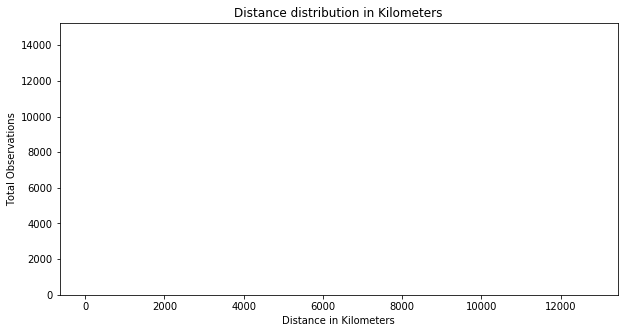

In [155]:
# Verify how the distances are distributed in the original dataframe.

df_new['distance_km'] = df_new['distance_km'].astype(float)

binsize = 0.2
bins = np.arange(0, df_new['distance_km'].max()+binsize, binsize)

def graph():
    plt.hist(data = df_new, alpha=0.5, facecolor='y', x = 'distance_km', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Distance distribution in Kilometers')    
plt.ylabel('Total Observations')
plt.xlabel('Distance in Kilometers')


plt.show(graph());

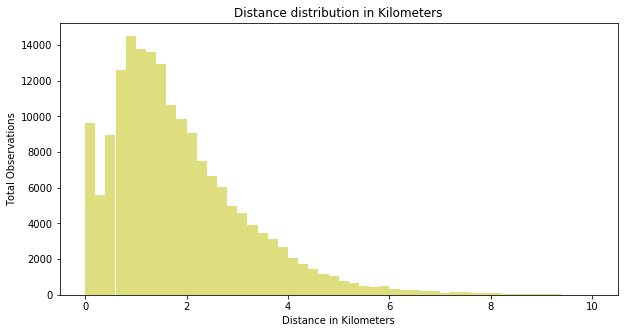

In [147]:
# Verify how the distances are distributed after assessing and cleaning.

binsize = 0.2
bins = np.arange(0, df_clean['distance_km'].max()+binsize, binsize)

def graph():
    plt.hist(data = df_clean, alpha=0.5, facecolor='y', x = 'distance_km', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Distance distribution in Kilometers')    
plt.ylabel('Total Observations')
plt.xlabel('Distance in Kilometers')


plt.show(graph());

##### Time

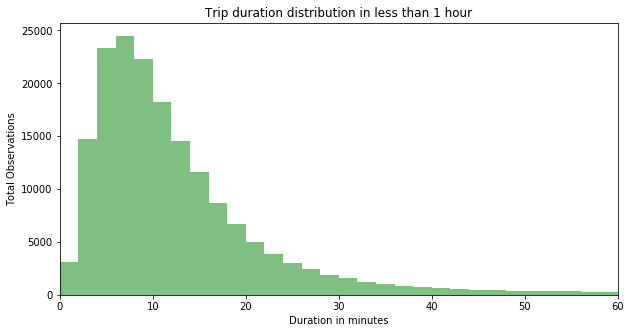

In [145]:
# Verify how the time in minutes is distributed

binsize = 2
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

def graph():
    plt.hist(data = df_clean, alpha=0.5, facecolor='g', x = 'duration_min', bins = bins)
    
plt.figure(figsize=[10,5])    
plt.title('Trip duration distribution in less than 1 hour')    
plt.ylabel('Total Observations')
plt.xlabel('Duration in minutes')
plt.xlim([0, 60])

plt.show(graph());

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? ###

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this? ###